#  The Spark Foundation Gratuate Rotational Intership Program
# GRIP :- Data Science and Business Analytics
## Task 1 :- Prediction using Supervised Machine Learning
## Objective :- Predict the Percentage of Student based on the number of study hours.
### Performed by :- Dipak Bhanudas Dhage

### Import Libraries

In [10]:
#################################################### Data Analysis & Calculation ###############################################

import pandas as pd  ## for read the file and Dataframe.
import numpy as np   ## for Statistics Calculation.

#################################################### Data Visualization #########################################################
import seaborn as sns                  ## for Data Visualization
from matplotlib import pyplot as plt   ## for Data Visualization
%matplotlib inline                 
import warnings
warnings.filterwarnings("ignore")      ## for Ignore the Warnings.


## Data Import

In [11]:
# Import the data from link
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
print("Data imported success ✓")
Data

Data imported success ✓


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Type 

In [12]:
Data.sample(4)

,Hours,Scores
19,7.4,69
22,3.8,35
0,2.5,21
8,8.3,81


In [13]:
# Its gives Column and Row Count
Data.size

50

In [14]:
# Its gives shape of Data
Data.shape

(25, 2)

In [15]:
# Checking information of Data 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Univariate Analysis

In [16]:
# Describe the About Data
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis (EDA)

#### Identify & Treatment of Outlier 

<AxesSubplot:>

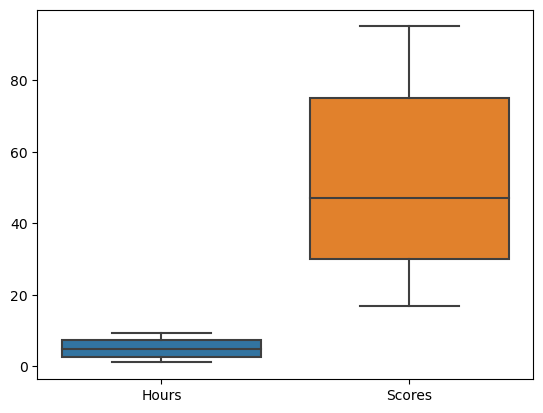

In [17]:
# Checking the outlier is present or not
sns.boxplot(data = Data)

* There is no outlier present in dataset, so we don't treatement it

In [18]:
#Find the duplicates

Data.duplicated().sum()

0

### Missing Value

In [19]:
# Check the missing value if present then Replace it. Mean,Median,Mode.
Data.isna().sum()

Hours     0
Scores    0
dtype: int64

* There is no Missing values in found in data.

## Data Partition

### Spliting the dataset into two parts 

In [20]:
# Check the data
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
# Putting feature variable to X
X = Data[['Scores']]

# Putting response variable to y
y = Data[['Hours']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [35]:
# Combine X_train and y_train By using concat function.
data = pd.concat([X_train,y_train], axis=1)
data.head()

,Scores,Hours
21,54,4.8
19,69,7.4
13,42,3.3
24,86,7.8
6,88,9.2


## Correlation

### Scatter Plot ( Bi-variate Analysis)

<AxesSubplot:xlabel='Scores', ylabel='Hours'>

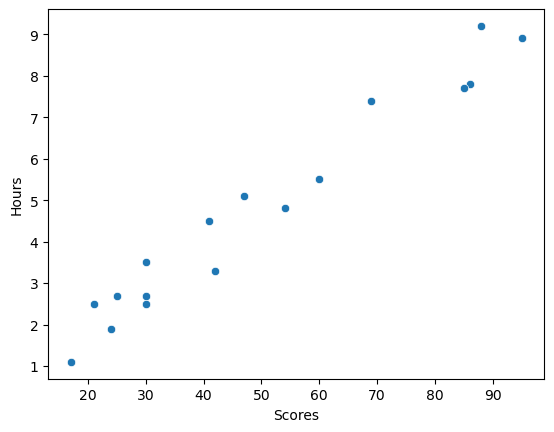

In [37]:
sns.scatterplot(x='Scores', y='Hours',data=data)

## Correlation Matrix

In [43]:
# Check the Matrix
data.corr()

,Scores,Hours
Scores,1.0000,0.9792
Hours,0.9792,1.0000


<AxesSubplot:>

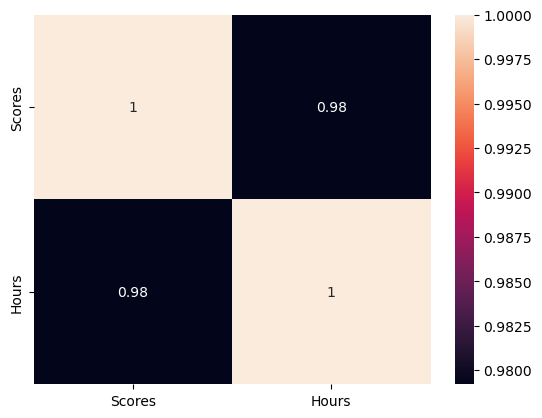

In [45]:
#Showing the matrix using Heatmap 
sns.heatmap(data.corr(),annot = True)

* 98% strong Positive correlation between Hours & Scores.

## Model Building

### Hypothesis Testing

* H0 : - There is no relationship between the Hours & Scores
                               Vs
* H1 : -There is  relationship between the Hours & Scores

Alpha =5% ( 0.05 )

In [48]:
X1=data.drop(['Hours','Scores'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Series([], dtype: float64)

In [49]:
import statsmodels.formula.api as smf
model = smf.ols('Hours ~ Scores ',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hours   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     349.4
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           8.39e-12
Time:                        12:18:42   Log-Likelihood:                -12.598
No. Observations:                  17   AIC:                             29.20
Df Residuals:                      15   BIC:                             30.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0006      0.287     -0.002      0.998      -0.612       0.611
Scores         0.0961      0.005     18.692      0.000       0.085       0.107
==============================================================================
Omnibus:                        7.973   Durbin-Watson:                   2.393
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                1.961
Skew:                           0.290   Prob(JB):                        0.375
Kurtosis:                       1.441   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

aov_table = sm.stats.anova_lm(reg, typ=2)

aov_table

## Conclusion 

* We Reject Ho
* There is  relationship between the Scores & Hours
* Accuracy of Model is 96%, So Model is Good Fit 
* Y = -0.0006 + 0.0961 * Scores

## Assumption of Model

* Linearity
* Homoscedasicity -- ( Constant Variance )
* Normality
* Model Error has to be independently identificaly Distibuted

# Linearity 

<AxesSubplot:xlabel='Scores', ylabel='Hours'>

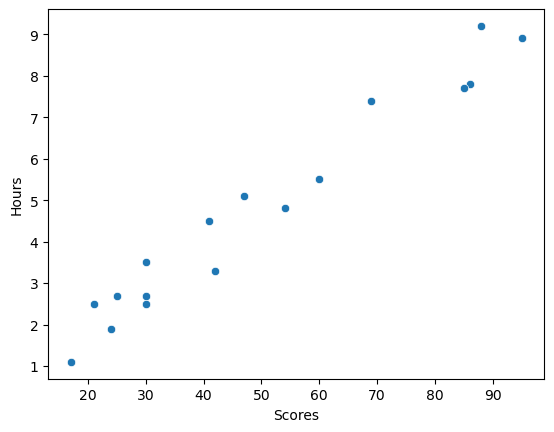

In [51]:
sns.scatterplot(x='Scores', y='Hours',data=data)

In [53]:
# y = Beta0 + Beta 1 * YearExperience
y= -0.0006 + 0.0961 * 5.3
y

0.50873

In [52]:
data['fitted_value']=model.fittedvalues #Predicted Value
data['residual']=model.resid  #Error
data.head()

,Scores,Hours,fitted_value,residual
21,54,4.8,5.188918,-0.388918
19,69,7.4,6.630458,0.769542
13,42,3.3,4.035685,-0.735685
24,86,7.8,8.264204,-0.464204
6,88,9.2,8.456409,0.743591


# Homoscedasicity ( Constant Variance )

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

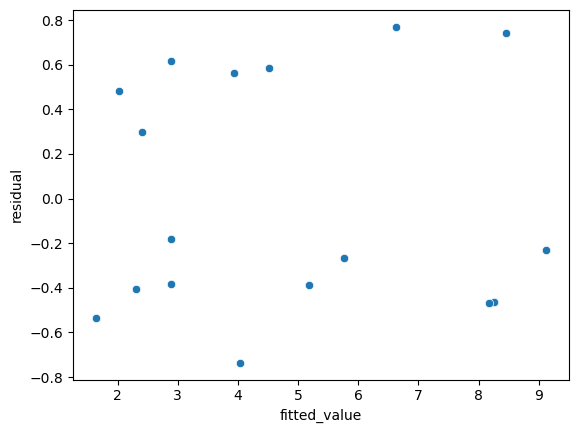

In [28]:
 #show the graph  
sns.scatterplot(x='fitted_value', y='residual',data=data)

# Normality

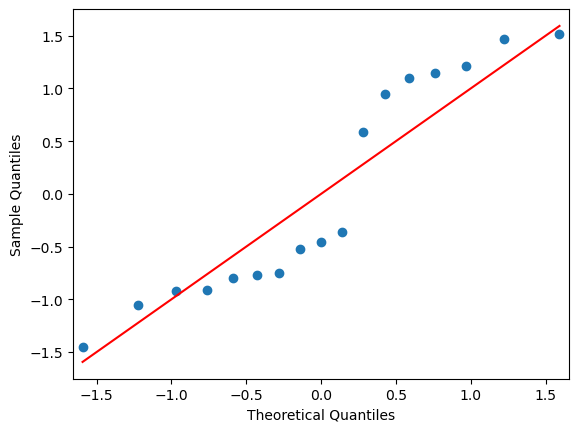

In [29]:
import statsmodels.api as sm
fig = sm.qqplot(data['residual'], fit=True, line='s')
## s indicate standardized line
fig.show()

# Model Error are ID

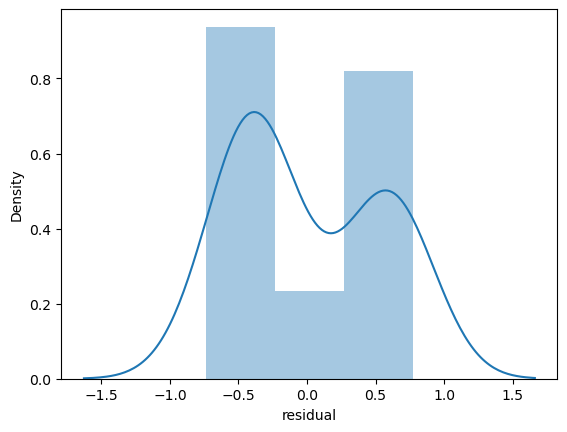

In [55]:
ax = sns.distplot(data.residual) 

In [56]:
df_test=pd.concat([X_test,y_test],axis=1)  # Concate the two test 

df_test.head()

,Scores,Hours
22,35,3.8
3,75,8.5
23,76,6.9
8,81,8.3
18,67,6.1


In [57]:
data_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
data_test.head()

,Scores,Hours,Prediction
22,35,3.8,3.362966
3,75,8.5,7.207074
23,76,6.9,7.303177
8,81,8.3,7.783691
18,67,6.1,6.438253


In [58]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, data_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.93


### Conclusion

* The Accuracy of model is 93%, the model is Good fit which is actually grates code for this model.